
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E00_linear_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

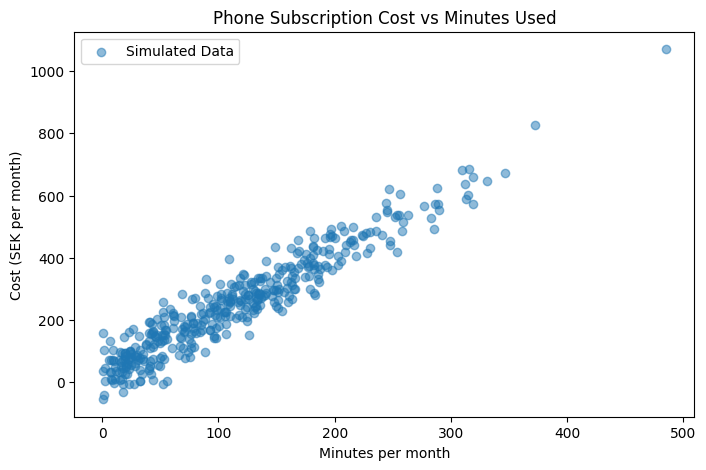

Total points before filtering: 400
Total points after filtering: 381
Points where x > 300: 11
Points where y < 0: 8


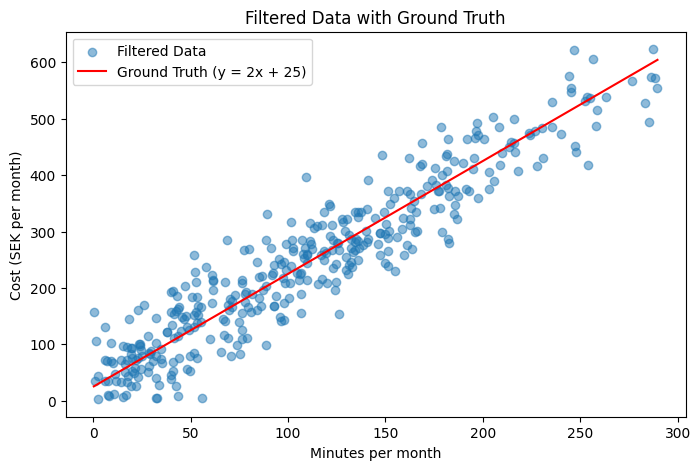

,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)

x = (np.random.normal(100,100,size=400))
x = np.abs(x)
epsilon = np.random.normal(0, 50,size= 400)

y = 2*x + 25 + epsilon


# Snyggare lösning! ##############################

# impoort numpy as np
# np.random.seed(42)
# X = np.abs(np.random.normal(100, 100, 400))
# E = np.random.normal(0, 50, 400)
# y = 2 * X + 25 + E
# M = np.column_stack([X, y])
# filtered = M[(M[:, 0] <= 300) & (M[:, 1] >= 0)]

##################################################

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label="Simulated Data")
plt.xlabel("Minutes per month")
plt.ylabel("Cost (SEK per month)")
plt.title("Phone Subscription Cost vs Minutes Used")
plt.legend()
plt.show()


mask = (x <= 300) & (y >= 0)

x_filtered = x[mask]
y_filtered = y[mask]


print(f"Total points before filtering: {len(x)}")
print(f"Total points after filtering: {len(x_filtered)}")
print(f"Points where x > 300: {np.sum(x > 300)}")
print(f"Points where y < 0: {np.sum(y < 0)}")


plt.figure(figsize=(8, 5))
plt.scatter(x_filtered, y_filtered, alpha=0.5, label="Filtered Data")
plt.plot(np.sort(x_filtered), 2 * np.sort(x_filtered) + 25, color='red', label="Ground Truth (y = 2x + 25)")  # Ensure correct order
plt.xlabel("Minutes per month")
plt.ylabel("Cost (SEK per month)")
plt.title("Filtered Data with Ground Truth")
plt.legend()
plt.show()


df = pd.DataFrame({"Minutes": x_filtered, "Cost": y_filtered})
df.head()


## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)


<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

In [401]:
import pandas as pd

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = .7, random_state: int = 42 , replace: bool = False) -> tuple:
    np.random.seed(random_state)
    n_samples = X.shape[0]
    train_size = int(n_samples * train_fraction)
    
    indices = np.random.choice(n_samples, size=train_size, replace=replace)
    test_indices = np.setdiff1d(np.arange(n_samples), indices)
    
    X_train, X_test = X.iloc[indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[indices], y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test


df_filtered = pd.DataFrame({"Minutes": x_filtered, "Cost": y_filtered})
X = df_filtered[['Minutes']]
y = df_filtered['Cost']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_fraction=0.7, random_state=42)


print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test", len(y_test))

Length of X_train: 266
Length of X_test: 115
Length of y_train: 266
Length of y_test 115


## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

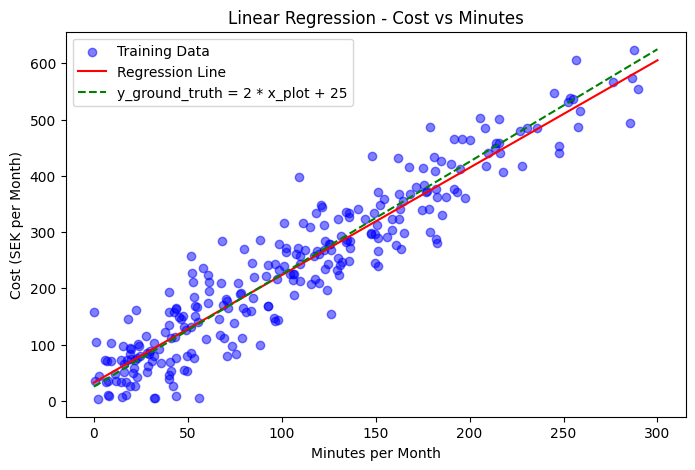

Intercept: Beta0: 32.2215
Intercept: Beta1: 1.9105


In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.column_stack([np.ones(len(X_train)), X_train["Minutes"].values])  
y = y_train.values


beta = np.linalg.pinv(X.T @ X) @ X.T @ y


x_plot = np.linspace(0, 300, 100)
y_pred = beta[0] + beta[1] * x_plot
y_ground_truth = 2 * x_plot + 25


plt.figure(figsize=(8, 5))
plt.scatter(X_train["Minutes"], y_train, color='blue', alpha=0.5, label="Training Data")
plt.plot(x_plot, y_pred, color='red', label="Regression Line")
plt.plot(x_plot, y_ground_truth, color="green", linestyle='--', label="y_ground_truth = 2 * x_plot + 25")
plt.xlabel("Minutes per Month")
plt.ylabel("Cost (SEK per Month)")
plt.title("Linear Regression - Cost vs Minutes")
plt.legend()
plt.show()


print(f"Intercept: Beta0: {beta[0]:.4f}")
print(f"Intercept: Beta1: {beta[1]:.4f}")



## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

&nbsp; b) Calculate MAE, MSE, RMSE (*)

<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

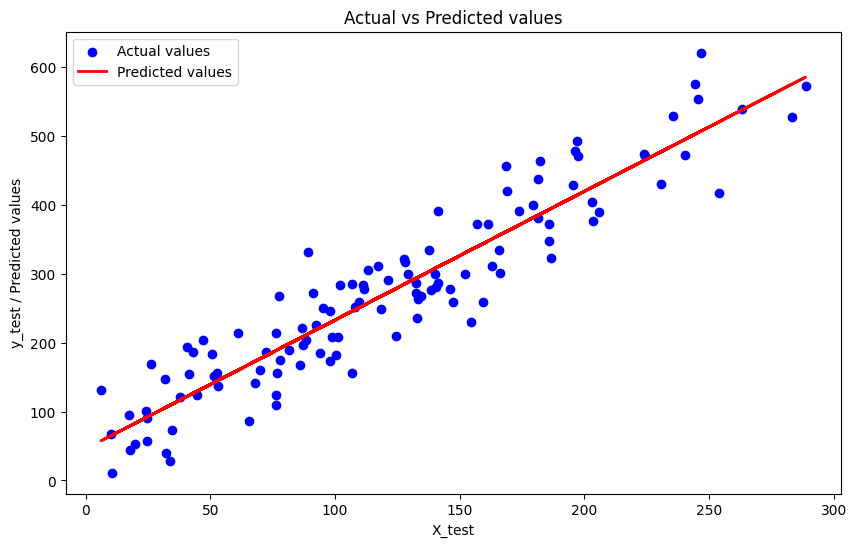

Mean Absolute Error (MAE): 39.6037
Mean Squared Error (MSE): 2316.2710
Root Mean Squared Error (RMSE): 48.1277


In [403]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_test, y_test)

y_pred = model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted values')
plt.xlabel('X_test')
plt.ylabel('y_test / Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

n = len(y_test)
MAE = np.divide(1, n) * np.sum(np.abs(y_test - y_pred))
MSE = np.divide(1, n) * np.sum(np.square(y_test - y_pred))
RMSE = np.sqrt(MSE)

print(f"Mean Absolute Error (MAE): {MAE:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")


## 4. Simulate more explanatory variables (\*)

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$

&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones. (\*)

&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ (\*)

&nbsp; c) Clean the data using the following constraints (\*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

&nbsp; d) Make new histograms for the variables. (\*)

<details>

<summary>Hint</summary>
Your data analysis skill toolbox together with statistics and linear algebra skills are getting quite handy here.

</details>

<br/>

<details>

<summary>Answer</summary>

a)

|      | Intercept | Minutes | SMS | Surf (GB) |    Cost |
| ---: | --------: | ------: | --: | --------: | ------: |
|    0 |         1 | 149.671 |  41 |   2.26301 | 502.396 |
|    1 |         1 | 86.1736 |  16 | 0.0315695 | 179.072 |
|  ... |       ... |     ... | ... |       ... |     ... |
| 9318 |         1 | 149.577 |  31 |   3.43929 | 536.176 |
| 9319 |         1 | 164.439 |  43 |   1.40641 | 406.674 |

b)

<img src="../assets/hist_variables.png" height="200"/>

d)

<img src="../assets/hist_var_cleaned.png" height="200"/>

</details>

---


       Intercept  Minutes (X_1)  SMS Cost (X_2)  Cost per GB (X_3)  \
count    10000.0   10000.000000    10000.000000       10000.000000   
mean         1.0     116.650879       24.581100           1.585903   
std          0.0      80.118044       14.508235           1.195842   
min          1.0       0.033132        0.000000           0.000144   
25%          1.0      51.628456       12.000000           0.621678   
50%          1.0     104.746533       24.000000           1.353720   
75%          1.0     168.338908       37.000000           2.297684   
max          1.0     492.623771       49.000000           8.958169   

           Cost (Y)  
count  10000.000000  
mean     349.509038  
std      179.457329  
min      -96.470950  
25%      215.368494  
50%      329.546608  
75%      466.845680  
max     1164.547248  

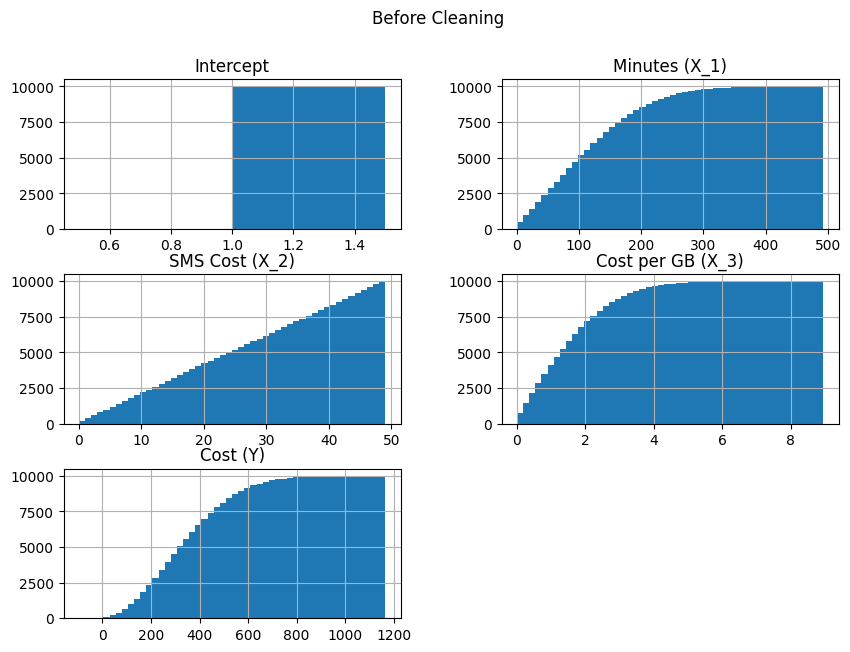

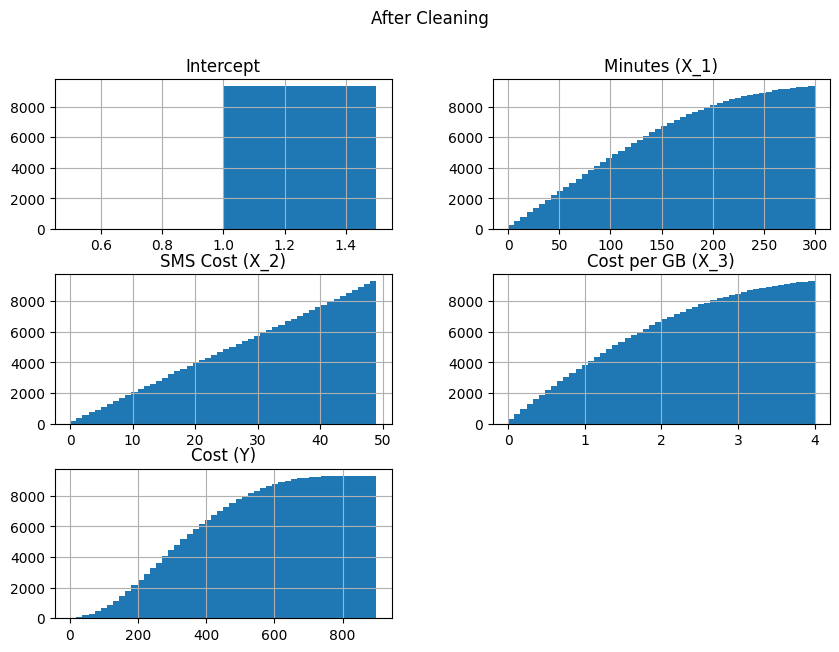

In [404]:
np.random.seed(42)

X_1 = np.abs(np.random.normal(100, 100, 10000))
X_2 = np.random.randint(0, 50, 10000)
X_3 = np.abs(np.random.normal(0,2,10000))
epsilon = np.random.normal(0, 50, 10000)

y = 2*X_1 + 0.5*X_2 + 50*X_3 + 25 + epsilon


df = pd.DataFrame({
 "Minutes (X_1)": X_1, 
 "SMS Cost (X_2)": X_2, 
 "Cost per GB (X_3)": X_3, 
 "Cost (Y)": y})

df.insert(0, "Intercept", 1)
print(df.describe())


df.hist(cumulative = True,figsize=(10, 7), bins=50)
plt.suptitle("Before Cleaning")
plt.show()


df_cleaned = df[(df["Cost per GB (X_3)"] < 4) & (df["Minutes (X_1)"] < 300) & (df["Cost (Y)"] > 0)]
df_cleaned.hist(cumulative = True,figsize=(10, 7), bins=50)
plt.suptitle("After Cleaning")
plt.show()

## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)


<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>
<summary>Answer</summary>


<img src="../assets/RMSE_simulation.png" height="200"/>

</details>

In [405]:

X,y = df_cleaned.drop("Cost (Y)", axis=1), df_cleaned["Cost (Y)"]
print(len(X))
print(len(y))

9320
9320


In [406]:

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = .8, random_state: int = 42 , replace: bool = False) -> tuple:
    np.random.seed(random_state)
    n_samples = X.shape[0]
    train_size = int(n_samples * train_fraction)
    
    indices = np.random.choice(n_samples, size=train_size, replace=replace)
    test_indices = np.setdiff1d(np.arange(n_samples), indices)
    
    X_train = X.iloc[indices]
    X_test =  X.iloc[test_indices]
    y_train = y.iloc[indices] 
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, y)



print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test", len(y_test))



Length of X_train: 7456
Length of X_test: 1864
Length of y_train: 7456
Length of y_test 1864


In [407]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

n = len(y_test)
MAE = np.divide(1, n) * np.sum(np.abs(y_test - y_pred))
MSE = np.divide(1, n) * np.sum(np.square(y_test - y_pred))
RMSE = np.sqrt(MSE)




print(f"MAE: {MAE:.4f}")
print(f"MSE: {MSE:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"Predicted values: {y_pred[:5]}")
print(f"Actual values: {y_test[:5]}")





MAE: 39.2377
MSE: 2421.2615
RMSE: 49.2063
Predicted values: [208.37760252 410.59900516 364.63948276 281.12873415 371.88262684]
Actual values: 1    179.072107
2    430.008213
4    398.016588
5    263.257001
9    460.194944
Name: Cost (Y), dtype: float64


[96.40818818510267, 43.342473754183764, 55.72452147435637, 48.86550201786734, 49.926019888945845, 49.97025416878713]


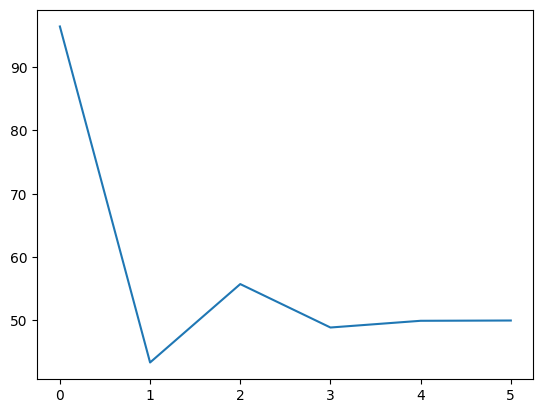

In [408]:
loop = (10, 100, 1000, 10000, 100000, 1000000)
rmse = []
for j in loop:
    np.random.seed(42)

    X_1 = np.abs(np.random.normal(100, 100, j))
    X_2 = np.random.randint(0, 50, j)
    X_3 = np.abs(np.random.normal(0,2,j))
    epsilon = np.random.normal(0, 50, j)

    y = 2*X_1 + 0.5*X_2 + 50*X_3 + 25 + epsilon

    df = pd.DataFrame(
    {
    "Minutes (X_1)": X_1, 
    "SMS Cost (X_2)": X_2, 
    "Cost per GB (X_3)": X_3, 
    "Cost (Y)": y})

    df.insert(0,"Intercept",1)

    X = df.drop("Cost (Y)", axis=1)
    y = df["Cost (Y)"]

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    n = len(y_test)
    MAE = np.divide(1, n) * np.sum(np.abs(y_test - y_pred))
    MSE = np.divide(1, n) * np.sum(np.square(y_test - y_pred))
    RMSE = np.sqrt(MSE)
    rmse.append(RMSE)

print(rmse)

plt.plot(rmse)
plt.show()

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---